In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import joblib

In [ ]:
root = '/content/drive/MyDrive/Bitcoin/'
df = pd.read_csv(f'{root}btc_1d_data_2018_to_2025.csv')

In [ ]:
# Convert timestamp to datetime
df["Open time"] = pd.to_datetime(df["Open time"])
df = df.set_index("Open time").sort_index()

# Compute log returns
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))

df.dropna(inplace=True)

print("Data loaded:", df.shape)
display(df.head())

Data loaded: (2880, 12)


,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,log_return
Open time,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999000 UTC,2.797171e+08,177728,11346.326739,1.580801e+08,0,0.092392
2018-01-03 00:00:00+00:00,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999000 UTC,2.361169e+08,162787,8994.953566,1.335873e+08,0,0.016517
2018-01-04 00:00:00+00:00,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999000 UTC,3.127816e+08,170310,12680.812951,1.861168e+08,0,0.009342
2018-01-05 00:00:00+00:00,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999000 UTC,3.693220e+08,192969,13346.622293,2.118299e+08,0,0.118869
2018-01-06 00:00:00+00:00,16960.39,17143.13,16011.21,17069.79,18571.457508,2018-01-06 23:59:59.999000 UTC,3.092169e+08,158242,11007.164056,1.834178e+08,0,0.006430


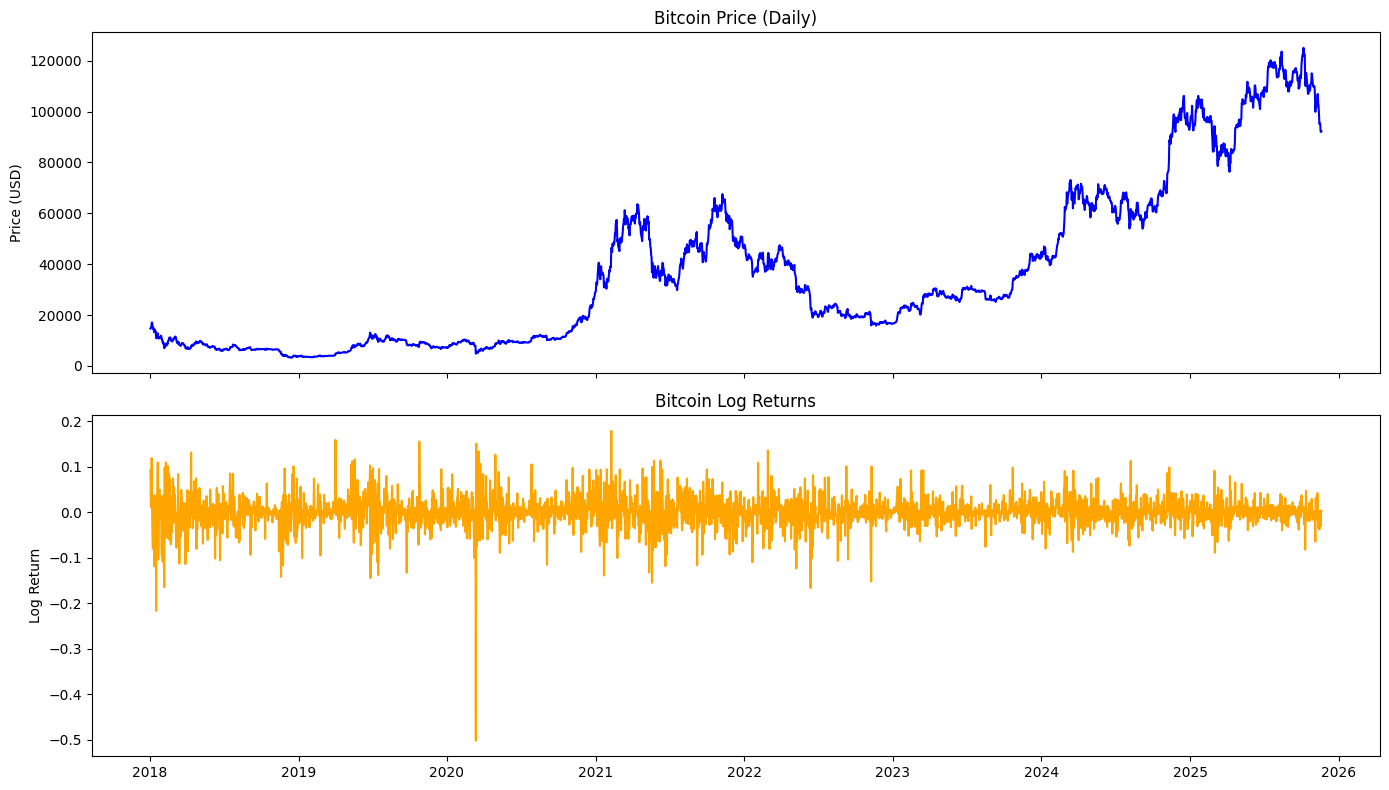

In [ ]:
# Price & Log Return Plot
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

ax[0].plot(df["Close"], color="blue")
ax[0].set_title("Bitcoin Price (Daily)")
ax[0].set_ylabel("Price (USD)")

ax[1].plot(df["log_return"], color="orange")
ax[1].set_title("Bitcoin Log Returns")
ax[1].set_ylabel("Log Return")

plt.tight_layout()
plt.show()

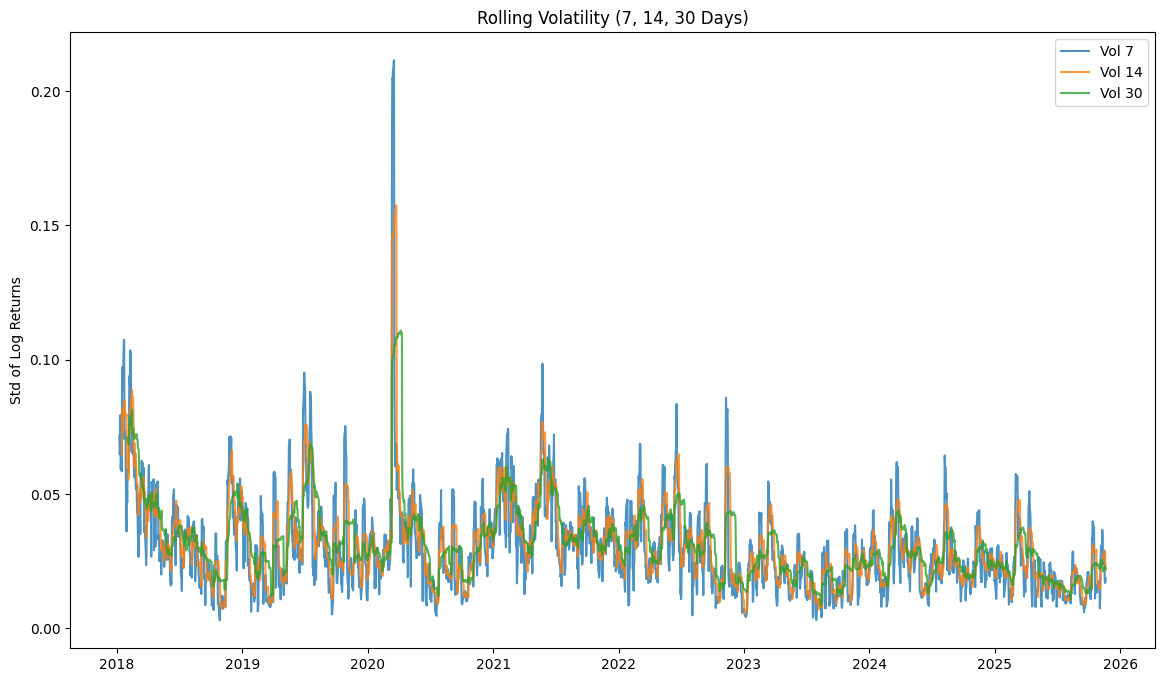

In [ ]:
# Rolling Volatility (7, 14, 30)
df["vol_7"] = df["log_return"].rolling(7).std()
df["vol_14"] = df["log_return"].rolling(14).std()
df["vol_30"] = df["log_return"].rolling(30).std()

plt.figure(figsize=(14, 8))
plt.plot(df["vol_7"], label="Vol 7", alpha=0.8)
plt.plot(df["vol_14"], label="Vol 14", alpha=0.8)
plt.plot(df["vol_30"], label="Vol 30", alpha=0.8)

plt.title("Rolling Volatility (7, 14, 30 Days)")
plt.ylabel("Std of Log Returns")
plt.legend()
plt.show()

<Figure size 1400x800 with 0 Axes>

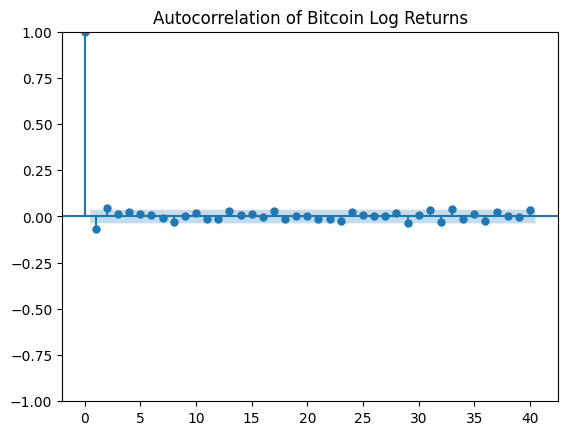

In [ ]:
# Autocorrelation (ACF) of Log Returns
plt.figure(figsize=(14, 8))
plot_acf(df["log_return"], lags=40)
plt.title("Autocorrelation of Bitcoin Log Returns")
plt.show()

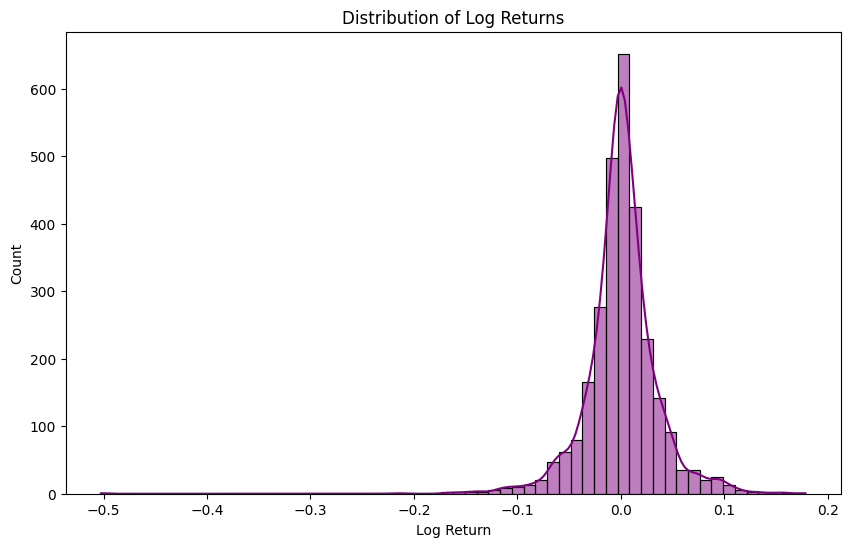

In [ ]:
# Distribution of Bitcoin Log Returns
plt.figure(figsize=(10, 6))
sns.histplot(df["log_return"], bins=60, kde=True, color="purple")
plt.title("Distribution of Log Returns")
plt.xlabel("Log Return")
plt.show()

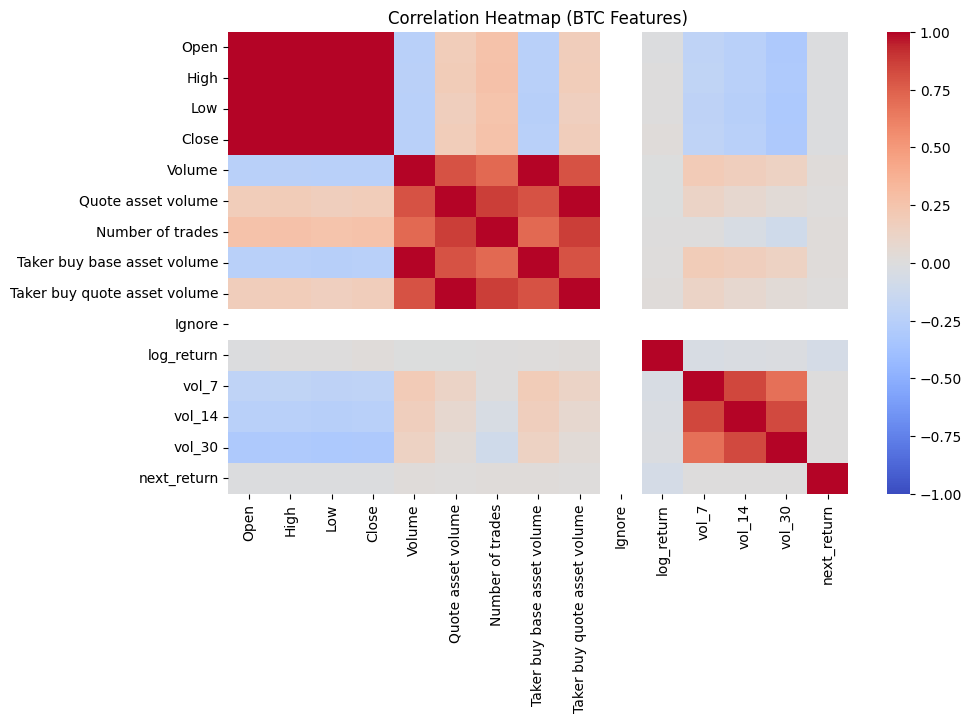

In [ ]:
# Correlation Heatmap of Engineered Features
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap (BTC Features)")
plt.show()

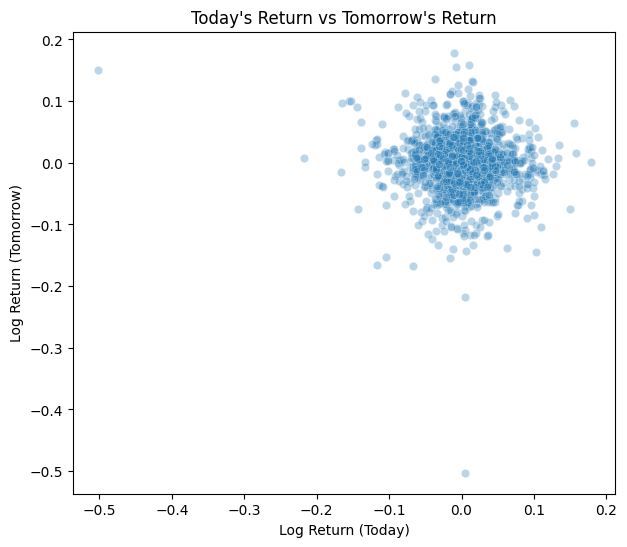

In [ ]:
# Return Today vs Return Tomorrow
df["next_return"] = df["log_return"].shift(-1)

plt.figure(figsize=(7, 6))
sns.scatterplot(x=df["log_return"], y=df["next_return"], alpha=0.3)
plt.title("Today's Return vs Tomorrow's Return")
plt.xlabel("Log Return (Today)")
plt.ylabel("Log Return (Tomorrow)")
plt.show()